In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
sns.set(rc={'figure.figsize':(10,6)})

In [5]:
def find_outliers_IQR(df):
    
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

# EXP 5 main lab

In [6]:
sheet_id = '1aqHnDaiRXntyrbj6qaqzR-4XnLbvtKU84FB_JLu5x5A'
sheet_name = 'EXP_5_main_lab'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
exp5lab = pd.read_csv(url)

In [7]:
exp5lab

,№,CODE,CUP_NUMBER,FEMALE,MALE,MUT,TEMP,TIME,DEAD,FERT,...,FERT_PERC,SHOCK_DEAD,SHOCK_ALIVE,SHOCK_NAME,HATCHED_DEAD,HATCHED_ALIVE,HATCHED_NAME,SWIM,SWIM_NAME,SWIM_PERC
0,1,11CC,1,1,1,C,C,NaN,5,37,...,"88,0952381",0,37,Polina,0,37,Sasha,33,Vika,"89,18918919"
1,2,11CC,2,1,1,C,C,NaN,2,42,...,"95,45454545",0,41,Polina,1,40,Sasha,33,Vika,"78,57142857"
2,3,11CC,3,1,1,C,C,NaN,5,33,...,"86,84210526",0,31,Polina,2,29,Sasha,26,Vika,"78,78787879"
3,4,11CC,4,1,1,C,C,NaN,11,38,...,"77,55102041",0,37,Polina,2,35,Sasha,32,Vika,"84,21052632"
4,5,12CC,1,1,2,C,C,NaN,4,58,...,"93,5483871",0,59,Lera,10,49,Vika,45,Polina,"77,5862069"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,60,21M38,4,2,1,M,38,40.0,3,54,...,"94,73684211",0,53,Alya(d)+Lera(a),3,50,Vika,33,Vika,"61,11111111"
60,61,22M38,1,2,2,M,38,40.0,2,40,...,"95,23809524",0,40,Lera,4,36,Vika,34,Polina,85
61,62,22M38,2,2,2,M,38,40.0,2,43,...,"95,55555556",1,40,Lera,4,36,Vika,35,Polina,"81,39534884"
62,63,22M38,3,2,2,M,38,40.0,0,58,...,100,0,55,Lera,1,54,Vika,50,Polina,"86,20689655"


In [8]:
exp5lab.FEMALE = exp5lab.FEMALE.astype(str)
exp5lab.MALE = exp5lab.MALE.astype(str)
exp5lab.TEMP = exp5lab.TEMP.astype(str)

exp5lab.FERT_PERC = exp5lab.FERT_PERC.str.replace(',', '.')
exp5lab.FERT_PERC = pd.to_numeric(exp5lab.FERT_PERC)

exp5lab.SWIM_PERC = exp5lab.SWIM_PERC.str.replace(',', '.')
exp5lab.SWIM_PERC = pd.to_numeric(exp5lab.SWIM_PERC)

In [9]:
exp5lab['FAMILY'] = exp5lab.FEMALE + exp5lab.MALE
exp5lab['CODE_COND'] = exp5lab.MUT + exp5lab.TEMP

### FIND OUTLIERS

In [9]:
find_outliers_IQR(exp5lab['FERT'])

56    85
Name: FERT, dtype: int64

In [10]:
find_outliers_IQR(exp5lab['FERT_PERC'])

3     77.551020
41    76.923077
Name: FERT_PERC, dtype: float64

In [11]:
find_outliers_IQR(exp5lab['HATCHED_ALIVE'])

56    71
Name: HATCHED_ALIVE, dtype: int64

In [12]:
find_outliers_IQR(exp5lab['SWIM'])

Series([], Name: SWIM, dtype: int64)

In [13]:
find_outliers_IQR(exp5lab['SWIM_PERC'])

Series([], Name: SWIM_PERC, dtype: float64)

<AxesSubplot: >

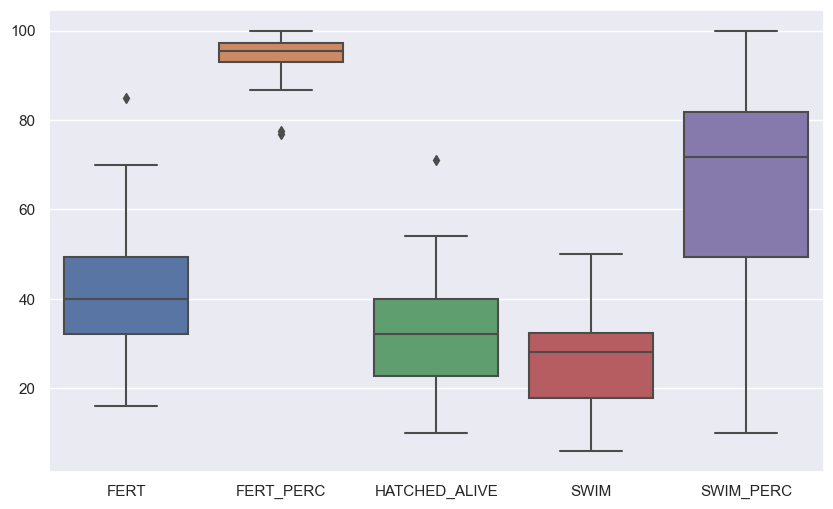

In [14]:
sns.boxplot(exp5lab[['FERT', 'FERT_PERC', 'HATCHED_ALIVE', 'SWIM', 'SWIM_PERC']])

### DRAW PLOT

In [10]:
# expected line logic: shock * mutagen
exp_11 = exp5lab[exp5lab['CODE'] == '11C38'].SWIM_PERC.mean() * exp5lab[exp5lab['CODE'] == '11MC'].SWIM_PERC.mean() / 100
exp_12 = exp5lab[exp5lab['CODE'] == '12C38'].SWIM_PERC.mean() * exp5lab[exp5lab['CODE'] == '12MC'].SWIM_PERC.mean() / 100
exp_21 = exp5lab[exp5lab['CODE'] == '21C38'].SWIM_PERC.mean() * exp5lab[exp5lab['CODE'] == '21MC'].SWIM_PERC.mean() / 100
exp_22 = exp5lab[exp5lab['CODE'] == '22C38'].SWIM_PERC.mean() * exp5lab[exp5lab['CODE'] == '22MC'].SWIM_PERC.mean() / 100

In [11]:
# expected line logic: (shock / control) * (mutagen / control) * control
exp_11 = (exp5lab[exp5lab['CODE'] == '11C38'].SWIM_PERC.mean() / exp5lab[exp5lab['CODE'] == '11CC'].SWIM_PERC.mean()) * \
         (exp5lab[exp5lab['CODE'] == '11MC'].SWIM_PERC.mean() / exp5lab[exp5lab['CODE'] == '11CC'].SWIM_PERC.mean()) * \
          exp5lab[exp5lab['CODE'] == '11CC'].SWIM_PERC.mean()
exp_12 = (exp5lab[exp5lab['CODE'] == '12C38'].SWIM_PERC.mean() / exp5lab[exp5lab['CODE'] == '12CC'].SWIM_PERC.mean()) * \
         (exp5lab[exp5lab['CODE'] == '12MC'].SWIM_PERC.mean() / exp5lab[exp5lab['CODE'] == '12CC'].SWIM_PERC.mean()) * \
          exp5lab[exp5lab['CODE'] == '12CC'].SWIM_PERC.mean()
exp_21 = (exp5lab[exp5lab['CODE'] == '21C38'].SWIM_PERC.mean() / exp5lab[exp5lab['CODE'] == '21CC'].SWIM_PERC.mean()) * \
         (exp5lab[exp5lab['CODE'] == '21MC'].SWIM_PERC.mean() / exp5lab[exp5lab['CODE'] == '21CC'].SWIM_PERC.mean()) * \
          exp5lab[exp5lab['CODE'] == '21CC'].SWIM_PERC.mean()
exp_22 = (exp5lab[exp5lab['CODE'] == '22C38'].SWIM_PERC.mean() / exp5lab[exp5lab['CODE'] == '22CC'].SWIM_PERC.mean()) * \
         (exp5lab[exp5lab['CODE'] == '22MC'].SWIM_PERC.mean() / exp5lab[exp5lab['CODE'] == '22CC'].SWIM_PERC.mean()) * \
          exp5lab[exp5lab['CODE'] == '22CC'].SWIM_PERC.mean()

/home/emulciber/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


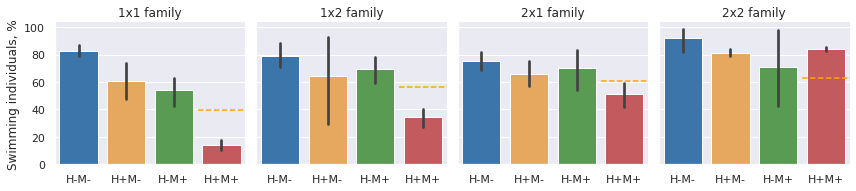

In [12]:
g = sns.FacetGrid(exp5lab, col="FAMILY")
g.map(sns.barplot, 'CODE_COND', 'SWIM_PERC', order=['CC', 'C38', 'MC', 'M38'], 
      palette={'CC': '#2976bb', 'C38': '#fdaa48', 'MC': '#50a747', 'M38': '#d3494e'})

g.set_xlabels("")
g.set_ylabels("Swimming individuals, %")
g.set_xticklabels(['H-M-', 'H+M-', 'H-M+', 'H+M+'])

ax1, ax2, ax3, ax4 = g.axes[0]

ax1.set_title('1x1 family')
ax2.set_title('1x2 family')
ax3.set_title('2x1 family')
ax4.set_title('2x2 family')

ax1.axhline(exp_11, xmin=0.75, ls='--', color='orange')
ax2.axhline(exp_12, xmin=0.75, ls='--', color='orange')
ax3.axhline(exp_21, xmin=0.75, ls='--', color='orange')
ax4.axhline(exp_22, xmin=0.75, ls='--', color='orange');
plt.savefig('../figures/paper1/exp5lab_hist.png')
plt.savefig('../figures/paper1/exp5lab_hist.pdf', format='pdf')

In [25]:
print('11C38:', exp5lab[exp5lab['CODE'] == '11C38'].SWIM_PERC.mean(), exp5lab[exp5lab['CODE'] == '11C38'].SWIM_PERC.median())
print('11MC:', exp5lab[exp5lab['CODE'] == '11MC'].SWIM_PERC.mean(), exp5lab[exp5lab['CODE'] == '11MC'].SWIM_PERC.median())
print('12C38:', exp5lab[exp5lab['CODE'] == '12C38'].SWIM_PERC.mean(), exp5lab[exp5lab['CODE'] == '12C38'].SWIM_PERC.median())
print('12MC:', exp5lab[exp5lab['CODE'] == '12MC'].SWIM_PERC.mean(), exp5lab[exp5lab['CODE'] == '12MC'].SWIM_PERC.median())
print('21C38:', exp5lab[exp5lab['CODE'] == '21C38'].SWIM_PERC.mean(), exp5lab[exp5lab['CODE'] == '21C38'].SWIM_PERC.median())
print('21MC:', exp5lab[exp5lab['CODE'] == '21MC'].SWIM_PERC.mean(), exp5lab[exp5lab['CODE'] == '21MC'].SWIM_PERC.median())
print('22C38:', exp5lab[exp5lab['CODE'] == '22C38'].SWIM_PERC.mean(), exp5lab[exp5lab['CODE'] == '22C38'].SWIM_PERC.median())
print('22MC:', exp5lab[exp5lab['CODE'] == '22MC'].SWIM_PERC.mean(), exp5lab[exp5lab['CODE'] == '22MC'].SWIM_PERC.median())

11C38: 60.639719202500004 60.885416665
11MC: 54.2366120975 57.37028302
12C38: 64.58764367750001 71.41666666500001
12MC: 69.675925925 72.685185185
21C38: 65.815295815 63.85281385
21MC: 70.1573185075 72.72004242
22C38: 81.35541925749999 81.334149325
22MC: 71.10805861 71.97802198000001


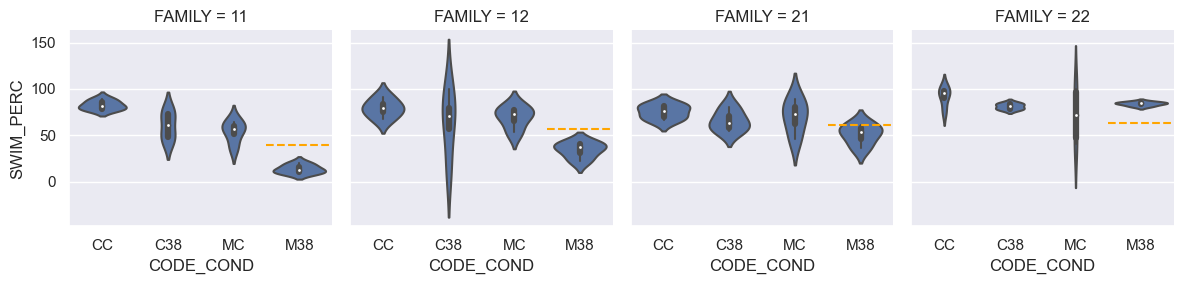

In [26]:
g = sns.FacetGrid(exp5lab, col="FAMILY")
g.map(sns.violinplot, 'CODE_COND', 'SWIM_PERC', order=['CC', 'C38', 'MC', 'M38'])

ax1, ax2, ax3, ax4 = g.axes[0]
ax1.axhline(exp_11, xmin=0.75, ls='--', color='orange')
ax2.axhline(exp_12, xmin=0.75, ls='--', color='orange')
ax3.axhline(exp_21, xmin=0.75, ls='--', color='orange')
ax4.axhline(exp_22, xmin=0.75, ls='--', color='orange');

In [27]:
# expected line logic: (shock / control) * (mutagen / control) * control
expected_5 = (exp5lab[exp5lab['CODE_COND'] == 'C38'].SWIM_PERC.mean() / exp5lab[exp5lab['CODE_COND'] == 'CC'].SWIM_PERC.mean()) * \
         (exp5lab[exp5lab['CODE_COND'] == 'MC'].SWIM_PERC.mean() / exp5lab[exp5lab['CODE_COND'] == 'CC'].SWIM_PERC.mean()) * \
          exp5lab[exp5lab['CODE_COND'] == 'CC'].SWIM_PERC.mean()

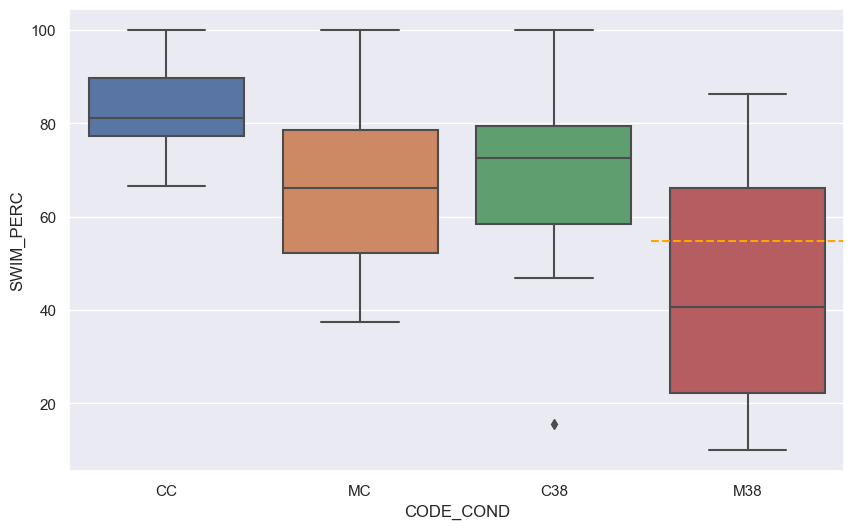

In [28]:
sns.boxplot(data=exp5lab, x='CODE_COND', y='SWIM_PERC')
plt.axhline(y=expected_5, xmin=0.75, color='orange', ls='--');

# EXP 5 main factory

In [30]:
sheet_id = '1aqHnDaiRXntyrbj6qaqzR-4XnLbvtKU84FB_JLu5x5A'
sheet_name = 'EXP_5_main_factory'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
exp5fac = pd.read_csv(url)

In [31]:
exp5fac

,№,CODE,FEMALE,MALE,MUT,TEMP,TIME,DEAD,FERT,FERT_NAME,TOTAL,TOTAL_SAMPLE,FERT.1,FERT_PERC,SWIM_PERC_FERT,SWIM_PERC_TOTAL,SWIM,SWIM_PERC_FERT_NORM
0,1,11CC,1,1,C,C,NaN,38,239,Lera,49203,277,42453,"86,28158845","2,827","2,439",1200,100
1,5,11MC,1,1,M,C,NaN,24,279,Lera,49203,303,45306,"92,07920792","0,278","0,256",126,"9,83888436"
2,9,11C38,1,1,C,38,40.0,38,239,Lera,49203,277,42453,"86,28158845","0,641","0,553",272,"22,66666667"
3,13,11M38,1,1,M,38,40.0,24,279,Lera,49203,303,45306,"92,07920792","0,022","0,020",10,"0,7808638381"
4,3,21CC,2,1,C,C,NaN,21,275,Lera,66528,296,61808,"92,90540541","3,721","3,457",2300,100
5,7,21MC,2,1,M,C,NaN,41,263,Lera,66528,304,57555,"86,51315789","0,047","0,041",27,"1,260650632"
6,11,21C38,2,1,C,38,40.0,21,275,Lera,66528,296,61808,"92,90540541","0,235","0,218",145,"6,304347826"
7,15,21M38,2,1,M,38,40.0,41,263,Lera,66528,304,57555,"86,51315789","0,205","0,177",118,"5,509510171"
8,2,12CC,1,2,C,C,NaN,31,284,Lera,48510,315,43736,"90,15873016","13,719","12,369",6000,100
9,6,12MC,1,2,M,C,NaN,144,189,Lera,49203,333,27926,"56,75675676","0,039","0,022",11,"0,2871252205"


In [32]:
exp5fac.FEMALE = exp5fac.FEMALE.astype(str)
exp5fac.MALE = exp5fac.MALE.astype(str)
exp5fac.TEMP = exp5fac.TEMP.astype(str)

exp5fac.FERT_PERC = exp5fac.FERT_PERC.str.replace(',', '.')
exp5fac.FERT_PERC = pd.to_numeric(exp5fac.FERT_PERC)

exp5fac.SWIM_PERC_FERT = exp5fac.SWIM_PERC_FERT.str.replace(',', '.')
exp5fac.SWIM_PERC_FERT = pd.to_numeric(exp5fac.SWIM_PERC_FERT)

exp5fac.SWIM_PERC_FERT_NORM = exp5fac.SWIM_PERC_FERT_NORM.str.replace(',', '.')
exp5fac.SWIM_PERC_FERT_NORM = pd.to_numeric(exp5fac.SWIM_PERC_FERT_NORM)

In [33]:
exp5fac['FAMILY'] = exp5fac.FEMALE + exp5fac.MALE
exp5fac['CODE_COND'] = exp5fac.MUT + exp5fac.TEMP

### FIND OUTLIERS

In [22]:
find_outliers_IQR(exp5fac['FERT.1'])

Series([], Name: FERT.1, dtype: int64)

In [23]:
find_outliers_IQR(exp5fac['FERT_PERC'])

9     56.756757
11    56.756757
Name: FERT_PERC, dtype: float64

In [24]:
find_outliers_IQR(exp5fac['SWIM'])

4     2300
8     6000
13    2000
Name: SWIM, dtype: int64

In [25]:
find_outliers_IQR(exp5fac['SWIM_PERC_FERT'])

4      3.721
8     13.719
13     3.250
Name: SWIM_PERC_FERT, dtype: float64

<AxesSubplot: >

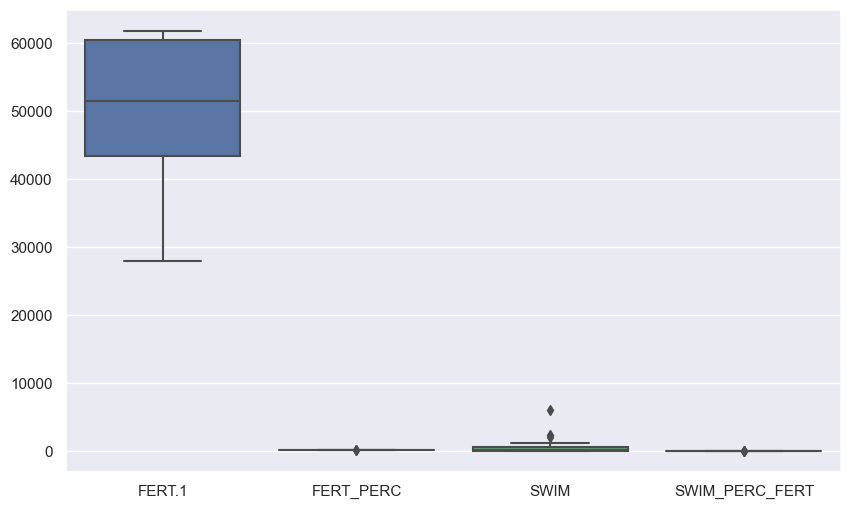

In [26]:
sns.boxplot(exp5fac[['FERT.1', 'FERT_PERC', 'SWIM', 'SWIM_PERC_FERT']])

### DRAW PLOT

In [34]:
exp_11 = exp5fac[exp5fac['CODE'] == '11C38'].SWIM_PERC_FERT_NORM.mean() * exp5fac[exp5fac['CODE'] == '11MC'].SWIM_PERC_FERT_NORM.mean() / 100
exp_21 = exp5fac[exp5fac['CODE'] == '21C38'].SWIM_PERC_FERT_NORM.mean() * exp5fac[exp5fac['CODE'] == '21MC'].SWIM_PERC_FERT_NORM.mean() / 100

/var/folders/lr/tz5w155s1wv9t8nfchl8bm700000gn/T/ipykernel_56051/1706216807.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g = sns.FacetGrid(exp5fac[(exp5fac['FAMILY'] == '11') | (exp5fac['FAMILY'] == '21')][(exp5fac['MUT'] == 'C')], col="FAMILY")


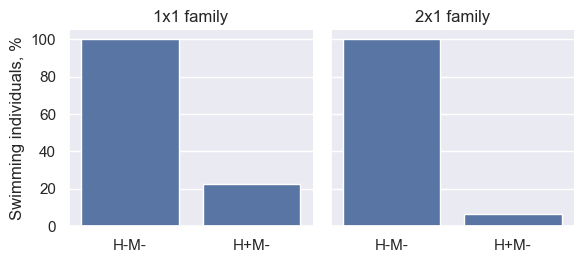

In [95]:
g = sns.FacetGrid(exp5fac[(exp5fac['FAMILY'] == '11') | (exp5fac['FAMILY'] == '21')][(exp5fac['MUT'] == 'C')], col="FAMILY")
g.map(sns.barplot, 'CODE_COND', 'SWIM_PERC_FERT_NORM', order=['CC', 'C38'])

g.set_xlabels("")
g.set_ylabels("Swimming individuals, %")
g.set_xticklabels(['H-M-', 'H+M-'])

ax1, ax2 = g.axes[0]

ax1.set_title('1x1 family')
ax2.set_title('2x1 family')

# ax1.axhline(exp_11, xmin=0.5, ls='--', color='orange')
# ax2.axhline(exp_21, xmin=0.5, ls='--', color='orange');

plt.savefig('../figures/exp5fac_main_plot.png')
plt.savefig('../figures/exp5fac_main_plot.svg', format='svg')

In [35]:
exp_11_common = exp5fac[exp5fac['CODE'] == '11C38'].SWIM_PERC_FERT.mean() * exp5fac[exp5fac['CODE'] == '11MC'].SWIM_PERC_FERT.mean() / 100
exp_12_common = exp5fac[exp5fac['CODE'] == '12C38'].SWIM_PERC_FERT.mean() * exp5fac[exp5fac['CODE'] == '12MC'].SWIM_PERC_FERT.mean() / 100
exp_21_common = exp5fac[exp5fac['CODE'] == '21C38'].SWIM_PERC_FERT.mean() * exp5fac[exp5fac['CODE'] == '21MC'].SWIM_PERC_FERT.mean() / 100
exp_22_common = exp5fac[exp5fac['CODE'] == '22C38'].SWIM_PERC_FERT.mean() * exp5fac[exp5fac['CODE'] == '22MC'].SWIM_PERC_FERT.mean() / 100

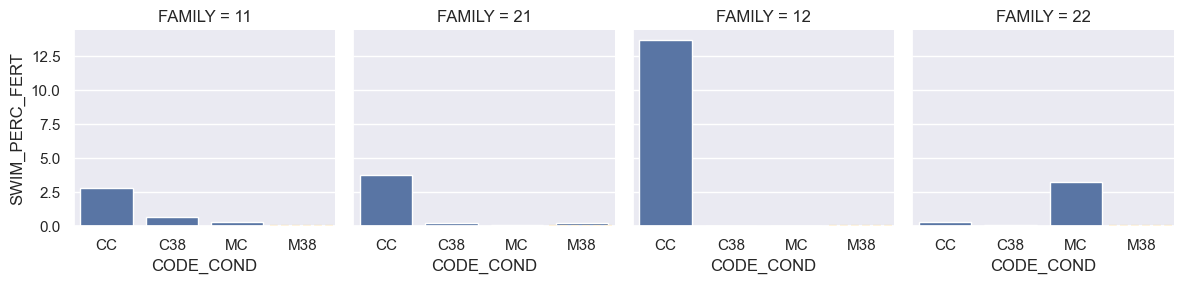

In [30]:
g = sns.FacetGrid(exp5fac, col="FAMILY")
g.map(sns.barplot, 'CODE_COND', 'SWIM_PERC_FERT', order=['CC', 'C38', 'MC', 'M38'])

ax1, ax2, ax3, ax4 = g.axes[0]
ax1.axhline(exp_11_common, xmin=0.75, ls='--', color='orange')
ax2.axhline(exp_12_common, xmin=0.75, ls='--', color='orange')
ax3.axhline(exp_21_common, xmin=0.75, ls='--', color='orange')
ax4.axhline(exp_22_common, xmin=0.75, ls='--', color='orange');

# EXP 8 main factory

In [13]:
sheet_id = '1aqHnDaiRXntyrbj6qaqzR-4XnLbvtKU84FB_JLu5x5A'
sheet_name = 'EXP_8_second_main_factory'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
exp8fac = pd.read_csv(url)

In [14]:
exp8fac.TEMP = exp8fac.TEMP.astype(str)

exp8fac.FERT_PERC = exp8fac.FERT_PERC.str.replace(',', '.')
exp8fac.FERT_PERC = pd.to_numeric(exp8fac.FERT_PERC)

exp8fac.SWIM_PERC_FERT = exp8fac.SWIM_PERC_FERT.str.replace(',', '.')
exp8fac.SWIM_PERC_FERT = pd.to_numeric(exp8fac.SWIM_PERC_FERT)

exp8fac.SWIM_PERC_FERT_NORM = exp8fac.SWIM_PERC_FERT_NORM.str.replace(',', '.')
exp8fac.SWIM_PERC_FERT_NORM = pd.to_numeric(exp8fac.SWIM_PERC_FERT_NORM)

In [15]:
exp8fac = exp8fac.iloc[9:13,]

In [16]:
exp8fac

,№,CODE,MUT,TEMP,TIME,DEAD,FERT,FERT_NAME,TOTAL,TOTAL_SAMPLE,FERT.1,FERT_PERC,SWIM_PERC_FERT,SWIM_PERC_TOTAL,SWIM,SWIM_PERC_FERT_NORM,SWIM_PERC_TOTAL_NORM
9,NaN,CC,C,nan,0,NaN,NaN,NaN,629244.0,NaN,274053.0,43.552805,43.787085,"19,07050365",120000.0,100.000000,100
10,NaN,C38,C,38.0,40,NaN,NaN,NaN,629244.0,NaN,274053.0,43.552805,31.745636,"13,82611515",87000.0,72.500000,"72,5"
11,NaN,MC,M,nan,0,NaN,NaN,NaN,629244.0,NaN,339140.0,53.896430,11.794537,"6,356834551",40000.0,26.936110,"33,33333333"
12,NaN,M38,M,38.0,40,NaN,NaN,NaN,629244.0,NaN,339140.0,53.896430,2.358907,"1,27136691",8000.0,5.387222,"6,666666667"


In [17]:
exp8fac['CODE_COND'] = exp8fac.CODE.str.replace('1', '').str.replace('2', '')

### FIND OUTLIERS

In [36]:
find_outliers_IQR(exp8fac['FERT.1'])

Series([], Name: FERT.1, dtype: float64)

In [37]:
find_outliers_IQR(exp8fac['FERT_PERC'])

Series([], Name: FERT_PERC, dtype: float64)

In [38]:
find_outliers_IQR(exp8fac['SWIM'])

Series([], Name: SWIM, dtype: float64)

In [39]:
find_outliers_IQR(exp8fac['SWIM_PERC_FERT'])

Series([], Name: SWIM_PERC_FERT, dtype: float64)

<AxesSubplot: >

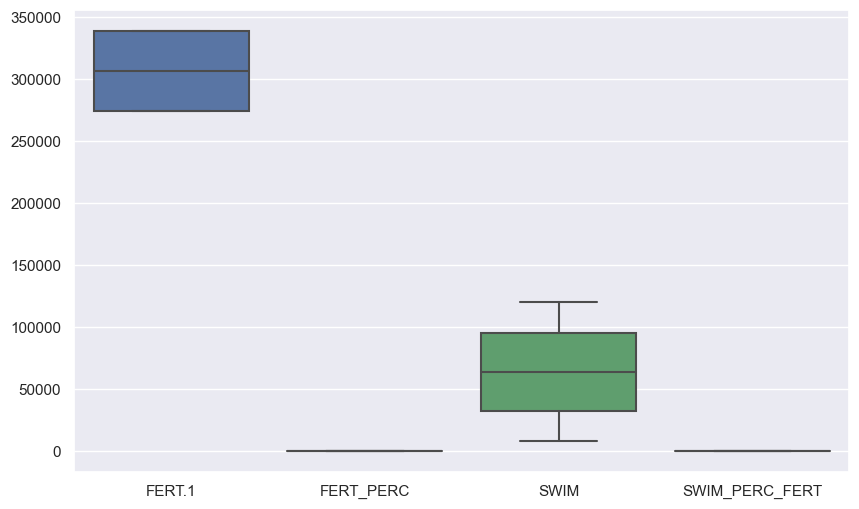

In [40]:
sns.boxplot(exp8fac[['FERT.1', 'FERT_PERC', 'SWIM', 'SWIM_PERC_FERT']])

### DRAW PLOT

In [18]:
expected_8 = exp8fac[exp8fac['CODE_COND'] == 'C38'].SWIM_PERC_FERT_NORM.mean() * exp8fac[exp8fac['CODE_COND'] == 'MC'].SWIM_PERC_FERT_NORM.mean() / 100

In [19]:
# expected line logic: (shock / control) * (mutagen / control) * control
expected_8 = (exp8fac[exp8fac['CODE_COND'] == 'C38'].SWIM_PERC_FERT_NORM.mean() / exp8fac[exp8fac['CODE_COND'] == 'CC'].SWIM_PERC_FERT_NORM.mean()) * \
         (exp8fac[exp8fac['CODE_COND'] == 'MC'].SWIM_PERC_FERT_NORM.mean() / exp8fac[exp8fac['CODE_COND'] == 'CC'].SWIM_PERC_FERT_NORM.mean()) * \
          exp8fac[exp8fac['CODE_COND'] == 'CC'].SWIM_PERC_FERT_NORM.mean()

In [20]:
expected_8

19.528679612250002

In [21]:
exp8fac[exp8fac['CODE_COND'] == 'M38']['SWIM_PERC_FERT_NORM']

12    5.387222
Name: SWIM_PERC_FERT_NORM, dtype: float64

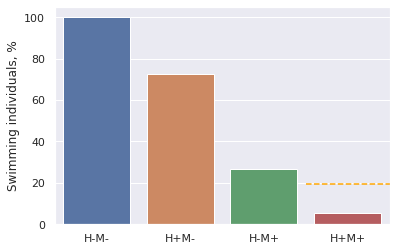

In [22]:
sns.barplot(exp8fac, x='CODE_COND', y='SWIM_PERC_FERT_NORM')
plt.axhline(y=expected_8, xmin=0.75, color='orange', ls='--') 
plt.xlabel("")
plt.ylabel("Swimming individuals, %")
plt.xticks(np.arange(4), ['H-M-', 'H+M-', 'H-M+', 'H+M+'])
plt.savefig('../figures/paper1/exp8_hist.png')
plt.savefig('../figures/paper1/exp8_hist.pdf', format='pdf')

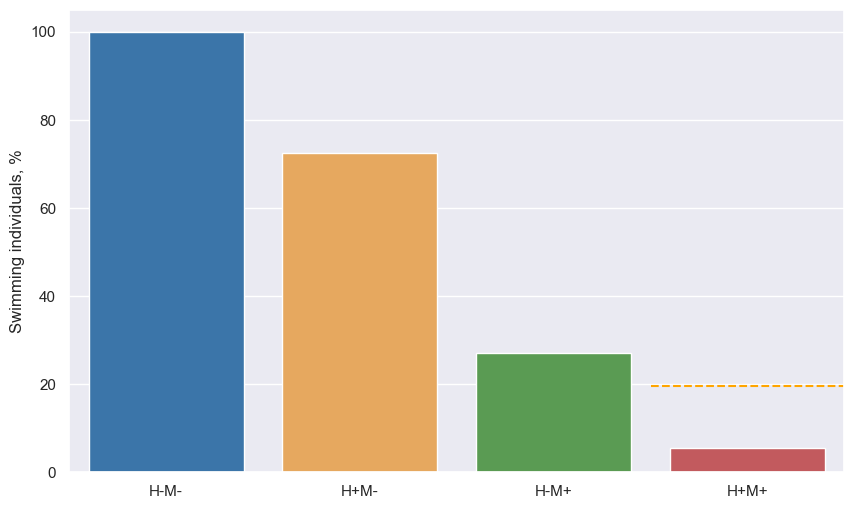

In [110]:
sns.barplot(exp8fac, x='CODE_COND', y='SWIM_PERC_FERT_NORM',
            palette={'CC': '#2976bb', 'C38': '#fdaa48', 'MC': '#50a747', 'M38': '#d3494e'})
plt.axhline(y=expected_8, xmin=0.75, color='orange', ls='--') 
plt.xlabel("")
plt.ylabel("Swimming individuals, %")
plt.xticks(np.arange(4), ['H-M-', 'H+M-', 'H-M+', 'H+M+']);

# EXP 5 POUNDS

In [46]:
sheet_id = '1aqHnDaiRXntyrbj6qaqzR-4XnLbvtKU84FB_JLu5x5A'
sheet_name = '5_PONDS'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
ponds = pd.read_csv(url)

In [47]:
ponds = ponds.rename(columns={"AVG_weight(g)": "AVG_weight"})

In [48]:
ponds['AVG_weight'] = ponds['AVG_weight'].str.replace(',', '.')
ponds['AVG_weight'] = pd.to_numeric(ponds['AVG_weight'])

In [49]:
ponds_fish = pd.DataFrame(columns=ponds.columns)

for row in ponds.index:
    for _ in range(ponds.iloc[row, 4]):
        ponds_fish = pd.concat([ponds_fish, ponds.iloc[row:row+1, ]])
        
ponds_fish

,Pond,Family,Mode,Type,Count,Weight(g),AVG_weight
0,1,1x1,Control,Crasus,10,280,28.000000
0,1,1x1,Control,Crasus,10,280,28.000000
0,1,1x1,Control,Crasus,10,280,28.000000
0,1,1x1,Control,Crasus,10,280,28.000000
0,1,1x1,Control,Crasus,10,280,28.000000
...,...,...,...,...,...,...,...
22,4,2x1,Shock,Scattered,3,100,33.333333
23,4,2x1,Shock,Naked,4,80,20.000000
23,4,2x1,Shock,Naked,4,80,20.000000
23,4,2x1,Shock,Naked,4,80,20.000000


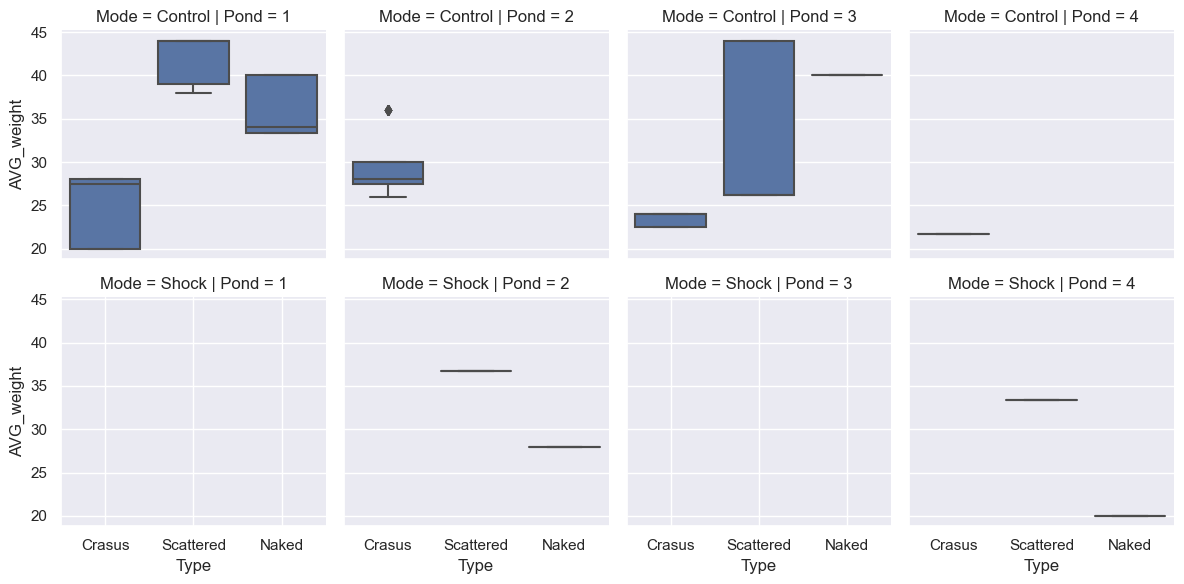

In [24]:
g = sns.FacetGrid(ponds_fish, col="Pond", row='Mode')
g.map(sns.boxplot, 'Type', 'AVG_weight', order=['Crasus', 'Scattered', 'Naked']);

In [25]:
st_mean_a = ponds_fish.AVG_weight.mean()
st_mean_g = st.gmean(ponds_fish.AVG_weight)
print(f'arithmetic_mean: {st_mean_a}', f'geometric_mean: {st_mean_g}', sep='\n')

arithmetic_mean: 31.946902654690266
geometric_mean: 31.020306869959647


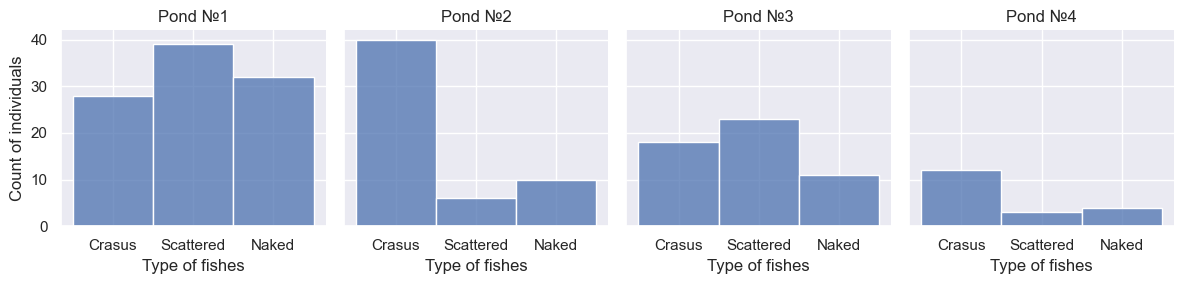

In [98]:
g = sns.FacetGrid(ponds_fish, col="Pond")
g.map(sns.histplot, 'Type')

g.set_xlabels("Type of fishes")
g.set_ylabels("Count of individuals")

ax1, ax2, ax3, ax4 = g.axes[0]

ax1.set_title('Pond №1')
ax2.set_title('Pond №2')
ax3.set_title('Pond №3')
ax4.set_title('Pond №4');

plt.savefig('../figures/ponds_main_plot.png')
plt.savefig('../figures/ponds_main_plot.svg', format='svg')

In [51]:
ponds_count = ponds_fish[['Pond', 'Family', 'Mode', 'Type', 'Count']]
ponds_count = ponds_count.groupby(['Pond', 'Type', 'Family', 'Mode']).count().reset_index()

ponds_count = ponds_count.pivot(index=['Pond', 'Family'], columns='Type', values=['Count']).reset_index()
ponds_count.columns = ['Pond', 'Family', 'Crasus', 'Naked', 'Scattered']

ponds_count['Naked_norm'] = ponds_count.Naked / ponds_count.Crasus * 100
ponds_count['Scattered_norm'] = ponds_count.Scattered / ponds_count.Crasus * 100
ponds_count = ponds_count.melt(id_vars=['Pond', 'Family'], value_vars=['Naked_norm', 'Scattered_norm'], var_name='Type')

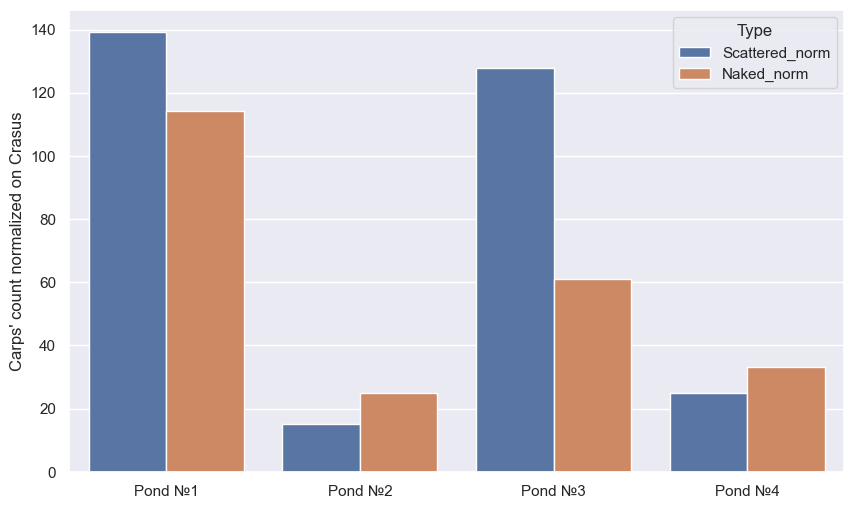

In [52]:
g = sns.barplot(data=ponds_count, x='Pond', y='value', hue='Type', hue_order=['Scattered_norm', 'Naked_norm'])
plt.ylabel("Carps' count normalized on Crasus")
plt.xlabel('')
g.set_xticklabels(['Pond №1', 'Pond №2', 'Pond №3', 'Pond №4']);

plt.savefig('../figures/ponds_main2_plot.png')
plt.savefig('../figures/ponds_main2_plot.svg', format='svg')

In [55]:
ponds_count

,Pond,Family,Type,value
0,1,1x1,Naked_norm,114.285714
1,2,1x1,Naked_norm,25.000000
2,3,2x1,Naked_norm,61.111111
3,4,2x1,Naked_norm,33.333333
4,1,1x1,Scattered_norm,139.285714
5,2,1x1,Scattered_norm,15.000000
6,3,2x1,Scattered_norm,127.777778
7,4,2x1,Scattered_norm,25.000000


In [68]:
pc = ponds_count.groupby('Pond').sum().reset_index()
pc['value'] = pc['value'] / 2
pc

/var/folders/lr/tz5w155s1wv9t8nfchl8bm700000gn/T/ipykernel_14447/1157230332.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pc = ponds_count.groupby('Pond').sum().reset_index()


,Pond,value
0,1,126.785714
1,2,20.000000
2,3,94.444444
3,4,29.166667


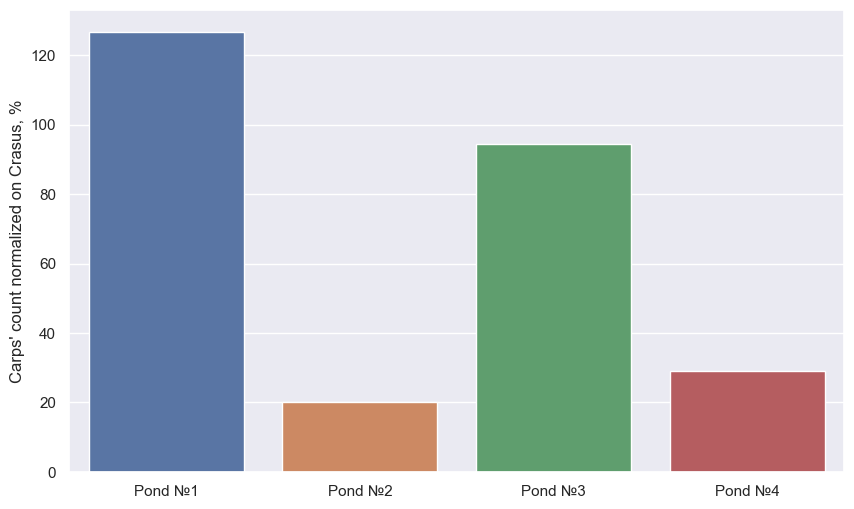

In [70]:
g = sns.barplot(data=pc, x='Pond', y='value')
plt.ylabel("Carps' count normalized on Crasus, %")
plt.xlabel('')
g.set_xticklabels(['Pond №1', 'Pond №2', 'Pond №3', 'Pond №4']);

plt.savefig('../figures/ponds_norm_on_crasus_plot.png')
plt.savefig('../figures/ponds_norm_on_crasus_plot.pdf', format='pdf')

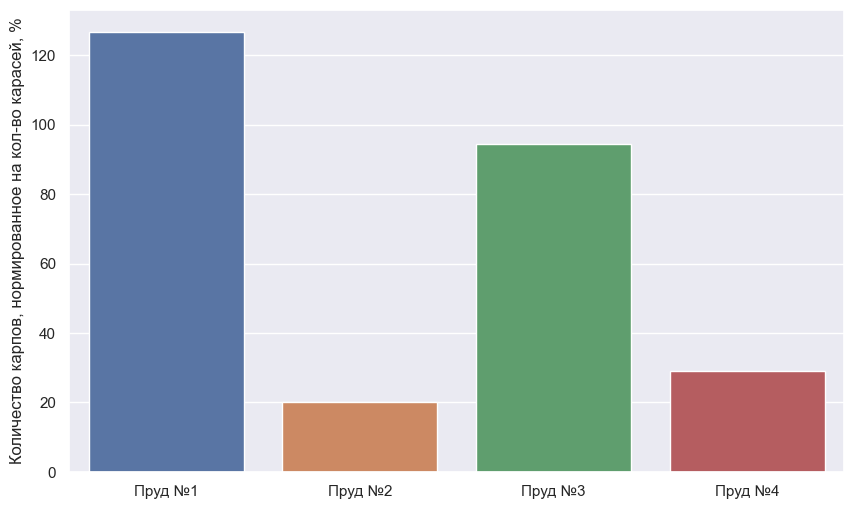

In [71]:
# ru version
g = sns.barplot(data=pc, x='Pond', y='value')
plt.ylabel("Количество карпов, нормированное на кол-во карасей, %")
plt.xlabel('')
g.set_xticklabels(['Пруд №1', 'Пруд №2', 'Пруд №3', 'Пруд №4']);

plt.savefig('../figures/ponds_norm_on_crasus_plot_ru.png')
plt.savefig('../figures/ponds_norm_on_crasus_plot_ru.pdf', format='pdf')

In [29]:
# Performing n-way ANOVA
model = ols('AVG_weight ~ Family + Mode + Type + Family:Mode + Family:Type + Mode:Type + Family:Mode:Type', data=ponds_fish).fit()
sm.stats.anova_lm(model, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,51976.470588,1.0,3040.721414,3.087951e-129
Family,516.334534,1.0,30.206543,1.089478e-07
Mode,482.664717,1.0,28.236795,2.666959e-07
Type,4992.069647,2.0,146.022738,7.647608e-41
Family:Mode,62.743567,1.0,3.670617,5.670001e-02
Family:Type,783.915773,2.0,22.930275,9.320455e-10
Mode:Type,566.394994,2.0,16.567587,2.023113e-07
Family:Mode:Type,356.710452,2.0,10.434117,4.723550e-05
Residual,3692.188833,216.0,NaN,NaN


<AxesSubplot: xlabel='Family', ylabel='AVG_weight'>

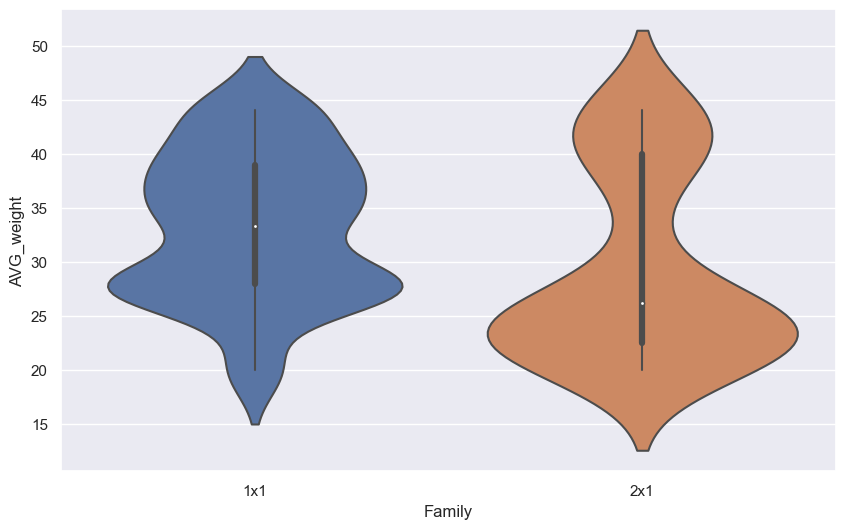

In [30]:
sns.violinplot(data=ponds_fish, x='Family', y='AVG_weight')

<AxesSubplot: xlabel='Mode', ylabel='AVG_weight'>

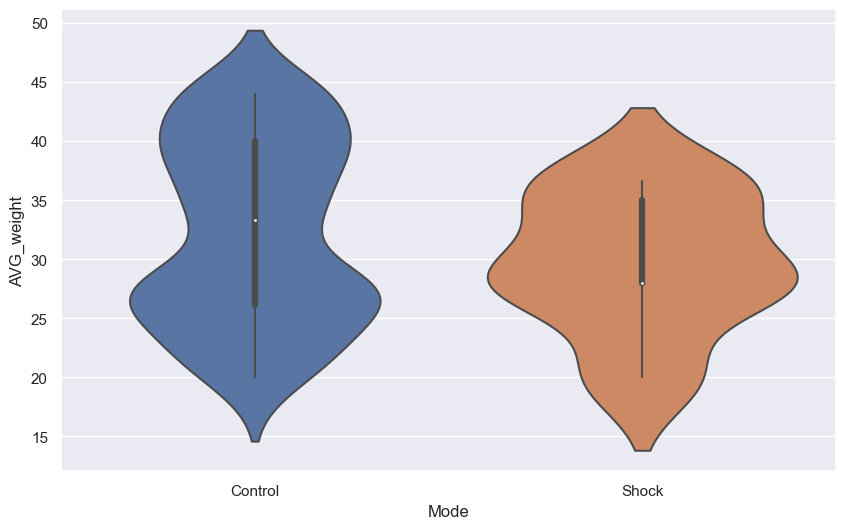

In [31]:
sns.violinplot(data=ponds_fish, x='Mode', y='AVG_weight')

<AxesSubplot: xlabel='Pond', ylabel='AVG_weight'>

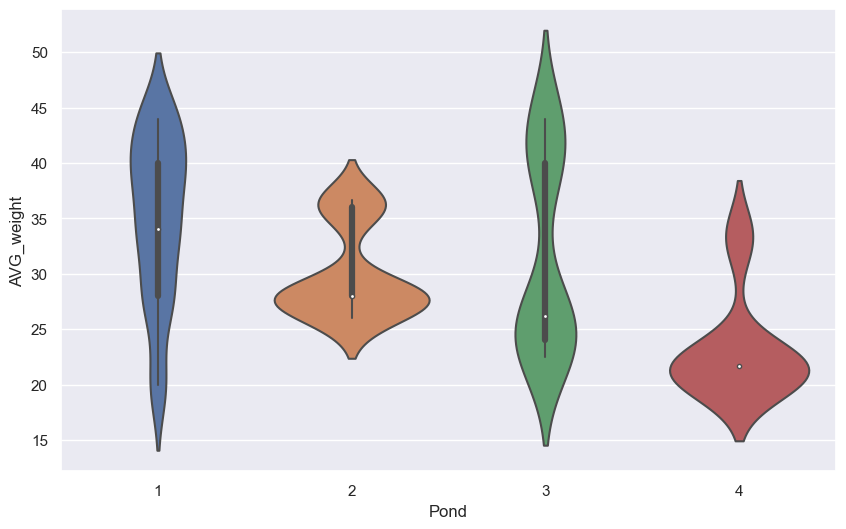

In [32]:
sns.violinplot(data=ponds_fish, x='Pond', y='AVG_weight')

<AxesSubplot: xlabel='Type', ylabel='AVG_weight'>

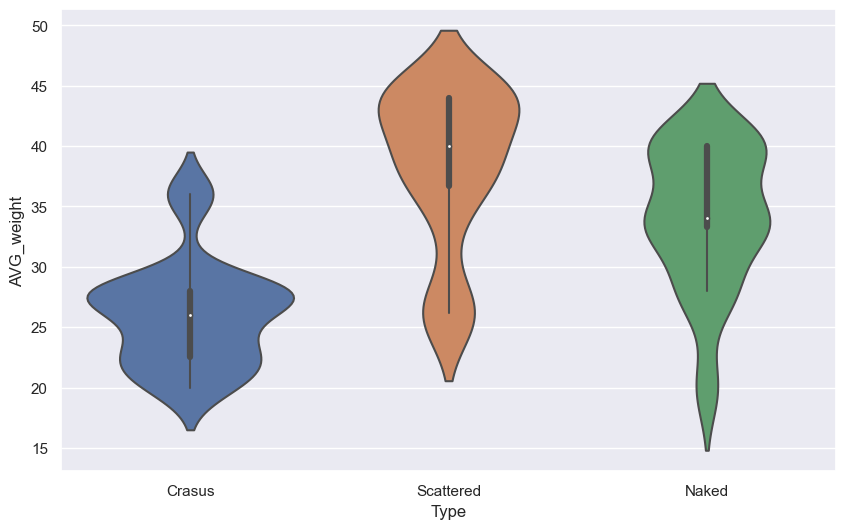

In [33]:
sns.violinplot(data=ponds_fish, x='Type', y='AVG_weight')

In [34]:
st.mannwhitneyu(ponds_fish[ponds_fish['Type'] == 'Scattered'].AVG_weight, ponds_fish[ponds_fish['Type'] == 'Naked'].AVG_weight)

MannwhitneyuResult(statistic=2816.5, pvalue=0.00011448319031047182)

# CARP TEST

In [91]:
sheet_id = '1PfTcSHiV41sq4wYnsyVVUBA5E1H92xgg2EeCqn8pYik'
sheet_name = 'main'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
carp_test = pd.read_csv(url)

In [92]:
carp_test = carp_test.iloc[20:].reset_index(drop=True)

In [93]:
carp_test

,Carp,N,Functionality,Family,TempTime,Mutagen,Eggs,L,L_without_C,Eye,h_head,h_body
0,2x1CC,21,normal,2x1,C,C,9,6.4,4.5,21,1.2,1.1
1,2x1CC,22,normal,2x1,C,C,9,6.8,5.0,22,1.2,1.1
2,2x1CC,23,normal,2x1,C,C,6,7.0,5.0,23,1.4,1.0
3,2x1CC,24,normal,2x1,C,C,10,7.0,5.1,24,1.2,1.1
4,2x1CC,25,normal,2x1,C,C,16,6.9,5.0,25,1.2,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...
499,2x1C2,520,normal,2x1,C,2,0,3.6,3.0,520,0.4,0.9
500,2x1C2,521,normal,2x1,C,2,0,3.8,3.4,521,0.6,0.9
501,2x1C2,522,normal,2x1,C,2,0,3.2,2.6,522,0.5,0.9
502,2x1C2,523,normal,2x1,C,2,0,4.6,3.8,523,0.4,0.8


In [94]:
carp_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Carp           504 non-null    object 
 1   N              504 non-null    int64  
 2   Functionality  504 non-null    object 
 3   Family         504 non-null    object 
 4   TempTime       504 non-null    object 
 5   Mutagen        504 non-null    object 
 6   Eggs           504 non-null    int64  
 7   L              504 non-null    float64
 8   L_without_C    504 non-null    float64
 9   Eye            504 non-null    int64  
 10  h_head         504 non-null    float64
 11  h_body         504 non-null    float64
dtypes: float64(4), int64(3), object(5)
memory usage: 47.4+ KB


/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


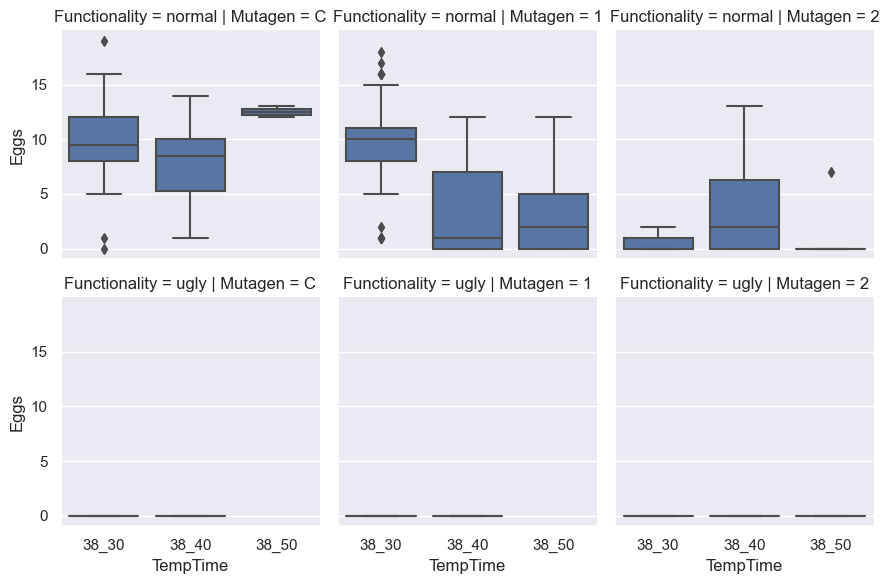

In [96]:
g = sns.FacetGrid(carp_test, col="Mutagen", row='Functionality')
g.map(sns.boxplot, 'TempTime', 'Eggs');

ON NEXT PLOT ONLY NORMAL (NOT UGLY) FISHES!!!!!!!!!!!!!!

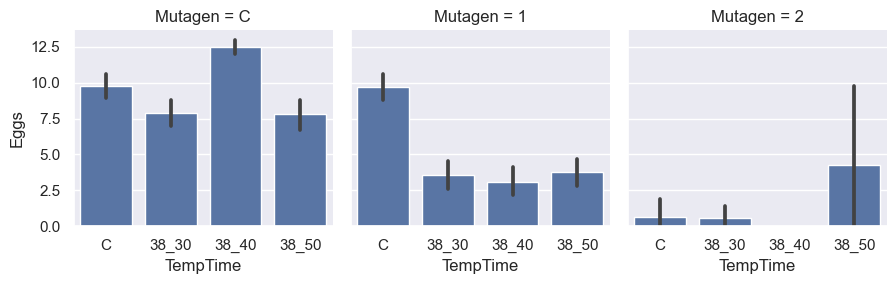

In [104]:
g = sns.FacetGrid(carp_test[carp_test['Functionality'] == 'normal'], col="Mutagen")
g.map(sns.barplot, 'TempTime', 'Eggs', order=['C', '38_30', '38_40', '38_50']);

выборки не одинаковые по размеру???? как их сравнивать??

In [107]:
st_mean_a = carp_test.Eggs.mean()
st_mean_g = st.gmean(carp_test.Eggs)
print(f'arithmetic_mean: {st_mean_a}', f'geometric_mean: {st_mean_g}', sep='\n')

arithmetic_mean: 5.158730158730159
geometric_mean: 0.0


In [108]:
# Performing n-way ANOVA
model = ols('Eggs ~ TempTime + Mutagen + TempTime:Mutagen', data=carp_test).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
TempTime,2206.369599,3.0,54.211872,2.731076e-30
Mutagen,1814.807499,2.0,66.886422,2.017921e-26
TempTime:Mutagen,613.595323,6.0,7.538209,9.527496e-08
Residual,6674.637899,492.0,NaN,NaN


# EXP 2022

In [34]:
sheet_id = '1aqHnDaiRXntyrbj6qaqzR-4XnLbvtKU84FB_JLu5x5A'
sheet_name = 'EXP_2022'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
exp2022 = pd.read_csv(url)

In [37]:
exp2022 = exp2022.rename(columns={'family': 'Family'})

exp2022 = exp2022[(exp2022['enu'] == 0) | (exp2022['enu'] == 2)]
exp2022 = exp2022[(exp2022['time'] == 0) | (exp2022['time'] == 40)]

exp2022['HM'] = exp2022['time'].apply(lambda x: 'H-' if x == 0 else 'H+') + \
                        exp2022['enu'].apply(lambda x: 'M-' if x == 0 else 'M+') 

exp2022['swim_per_fert'] = exp2022['swim_per_fert'].str.replace(',', '.').map(float)

In [38]:
exp2022

,petri,Family,mode,mode_scr,temperature,time,enu,dead,alive,total,...,hatched,hatched_per,swimming,freaks,swim_per,swim_per_fert,freaks_per,food,food_per,HM
0,1,1x1,control,ctrl,0,0,0,9,45,54,...,26,"57,78",23,3,"88,46",51.11,"11,54",NaN,NaN,H-M-
1,2,1x1,control,ctrl,0,0,0,4,20,24,...,9,45,5,4,"55,56",25.00,"44,44",NaN,NaN,H-M-
2,3,1x1,control,ctrl,0,0,0,4,40,44,...,11,"27,5",10,0,100,25.00,0,NaN,NaN,H-M-
3,4,1x1,control,ctrl,0,0,0,2,20,22,...,9,45,8,1,"88,89",40.00,"11,11",NaN,NaN,H-M-
4,5,1x1,control,ctrl,0,0,0,5,21,26,...,12,"57,14",11,1,"91,67",52.38,"8,33",NaN,NaN,H-M-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,216,2x2,38_40_min_ENU_2,38_40_en2,38,40,2,37,23,60,...,0,0,0,0,0,0.00,0,NaN,NaN,H+M+
216,217,2x2,38_40_min_ENU_2,38_40_en2,38,40,2,20,54,74,...,1,"1,85",0,0,0,0.00,0,NaN,NaN,H+M+
217,218,2x2,38_40_min_ENU_2,38_40_en2,38,40,2,17,29,46,...,0,0,0,0,0,0.00,0,NaN,NaN,H+M+
218,219,2x2,38_40_min_ENU_2,38_40_en2,38,40,2,22,21,43,...,0,0,0,0,0,0.00,0,NaN,NaN,H+M+


/home/emulciber/.local/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/emulciber/.local/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/emulciber/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


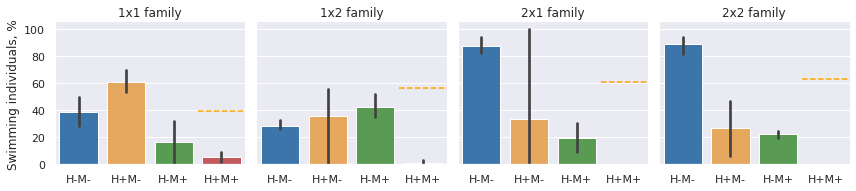

In [39]:
g = sns.FacetGrid(exp2022, col="Family")
g.map(sns.barplot, 'HM', 'swim_per_fert', order=['H-M-', 'H+M-', 'H-M+', 'H+M+'],  
      palette={'H-M-': '#2976bb', 'H+M-': '#fdaa48', 'H-M+': '#50a747', 'H+M+': '#d3494e'})

g.set_xlabels("")
g.set_ylabels("Swimming individuals, %")

ax1, ax2, ax3, ax4 = g.axes[0]

ax1.set_title('1x1 family')
ax2.set_title('1x2 family')
ax3.set_title('2x1 family')
ax4.set_title('2x2 family')

ax1.axhline(exp_11, xmin=0.75, ls='--', color='orange')
ax2.axhline(exp_12, xmin=0.75, ls='--', color='orange')
ax3.axhline(exp_21, xmin=0.75, ls='--', color='orange')
ax4.axhline(exp_22, xmin=0.75, ls='--', color='orange');
plt.savefig('../figures/paper1/exp2022_hist.png')
plt.savefig('../figures/paper1/exp2022_hist.pdf', format='pdf')

#### on Hatching

In [28]:
sheet_id = '1aqHnDaiRXntyrbj6qaqzR-4XnLbvtKU84FB_JLu5x5A'
sheet_name = 'EXP_2022_relativeDecrease'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
exp2022_rd = pd.read_csv(url)

exp2022_rd['Time_ENU'] = exp2022_rd['Time'].map(str) + ' ' + exp2022_rd['ENU'].map(str)
exp2022_rd = exp2022_rd[(exp2022_rd['Time_ENU'] == '40 0.0') | (exp2022_rd['Time_ENU'] == '40 2.0')]

exp2022_rd['Hatching+'] = exp2022_rd['hH+'] / exp2022_rd['fH+'] * 100
exp2022_rd['Hatching-'] = exp2022_rd['hH-'] / exp2022_rd['fH-'] * 100
exp2022_rd['Mut'] = exp2022_rd['ENU'].apply(lambda x: 'M-' if x == 0.0 else 'M+')

In [25]:
exp2022_rd

,Family,ENU,Time,fH+,hH+,fH-,hH-,RelativeDecrease_inHatching,Time_ENU,Hatching+,Hatching-,Mut
3,1x1,0.0,40,229,161,146,67,1.532,40 0.0,70.305677,45.890411,M-
5,1x1,2.0,40,147,11,176,38,0.347,40 2.0,7.482993,21.590909,M+
12,1x2,0.0,40,56,38,63,34,1.257,40 0.0,67.857143,53.968254,M-
14,1x2,2.0,40,157,2,158,85,0.024,40 2.0,1.273885,53.797468,M+
21,2x1,0.0,40,4,2,231,221,0.523,40 0.0,50.000000,95.670996,M-
23,2x1,2.0,40,99,0,127,47,0.000,40 2.0,0.000000,37.007874,M+
30,2x2,0.0,40,127,92,155,150,0.749,40 0.0,72.440945,96.774194,M-
32,2x2,2.0,40,158,1,151,107,0.009,40 2.0,0.632911,70.860927,M+


In [26]:
exp2022_rd_melted = pd.melt(exp2022_rd, id_vars=['Family', 'Mut'], value_vars=['Hatching+', 'Hatching-'], 
                         var_name='Heat_shock', value_name='Hatching')
exp2022_rd_melted['HM'] = 'H' + exp2022_rd_melted['Heat_shock'].apply(lambda x: x[-1:]) + exp2022_rd_melted['Mut']

In [27]:
exp2022_rd_melted

,Family,Mut,Heat_shock,Hatching,HM
0,1x1,M-,Hatching+,70.305677,H+M-
1,1x1,M+,Hatching+,7.482993,H+M+
2,1x2,M-,Hatching+,67.857143,H+M-
3,1x2,M+,Hatching+,1.273885,H+M+
4,2x1,M-,Hatching+,50.000000,H+M-
5,2x1,M+,Hatching+,0.000000,H+M+
6,2x2,M-,Hatching+,72.440945,H+M-
7,2x2,M+,Hatching+,0.632911,H+M+
8,1x1,M-,Hatching-,45.890411,H-M-
9,1x1,M+,Hatching-,21.590909,H-M+


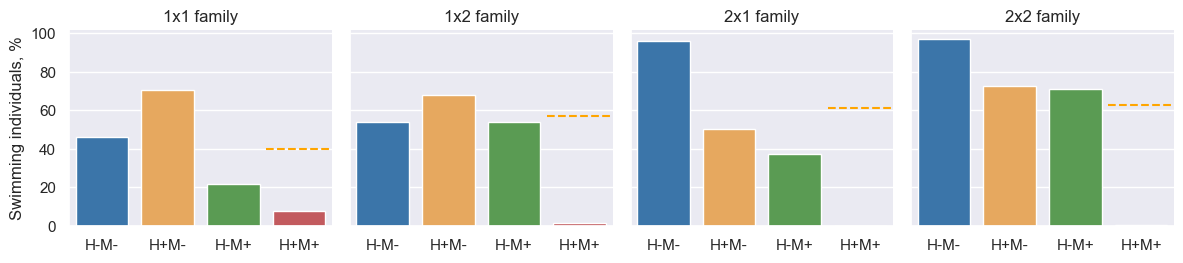

In [112]:
g = sns.FacetGrid(exp2022_rd_melted, col="Family")
g.map(sns.barplot, 'HM', 'Hatching', order=['H-M-', 'H+M-', 'H-M+', 'H+M+'],  
      palette={'H-M-': '#2976bb', 'H+M-': '#fdaa48', 'H-M+': '#50a747', 'H+M+': '#d3494e'})

g.set_xlabels("")
g.set_ylabels("Hatching individuals, %")

ax1, ax2, ax3, ax4 = g.axes[0]

ax1.set_title('1x1 family')
ax2.set_title('1x2 family')
ax3.set_title('2x1 family')
ax4.set_title('2x2 family')

ax1.axhline(exp_11, xmin=0.75, ls='--', color='orange')
ax2.axhline(exp_12, xmin=0.75, ls='--', color='orange')
ax3.axhline(exp_21, xmin=0.75, ls='--', color='orange')
ax4.axhline(exp_22, xmin=0.75, ls='--', color='orange');